<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/mnist_digit_recognition_yefimenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset

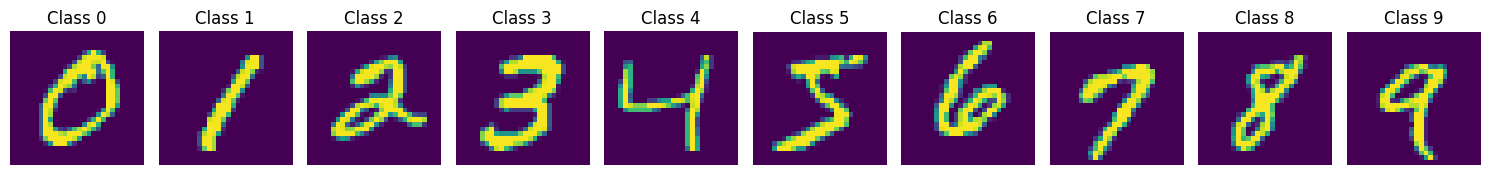

In [4]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#Loads the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Plots the data
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X_train[y_train == i][0])
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")
plt.tight_layout()
plt.show()

Gets the dataset, loads it and then plots the classes

In [5]:
from sklearn.model_selection import train_test_split

#Dividing by 255 to make it between [0,1] for white and black pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

/255.0 to make pixel values between [0,1] and then train. Using random state 42 as after doing research you will get the same split of data every time compared to if you used a different random state

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8562 - loss: 0.4857 - val_accuracy: 0.9576 - val_loss: 0.1432
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9601 - loss: 0.1340 - val_accuracy: 0.9644 - val_loss: 0.1190
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9712 - loss: 0.0904 - val_accuracy: 0.9691 - val_loss: 0.1030
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9775 - loss: 0.0696 - val_accuracy: 0.9706 - val_loss: 0.0952
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9806 - loss: 0.0615 - val_accuracy: 0.9724 - val_loss: 0.0918
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9848 - loss: 0.0467 - val_accuracy: 0.9744 - val_loss: 0.0855
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9900 - loss: 0.031

<Axes: title={'center': 'Accuracy'}>

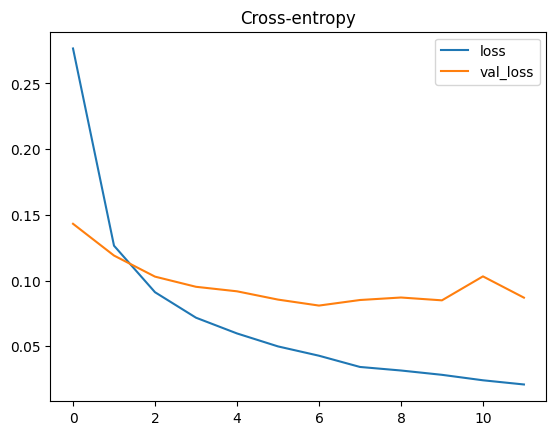

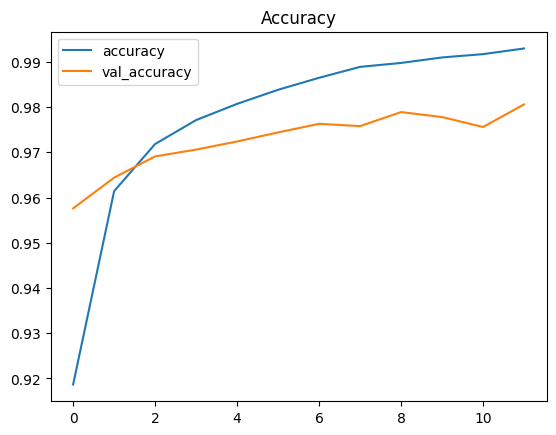

In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#One hot encode to get categorical_crossentropy to work
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_test, num_classes=10)

#Best model(results are at the very bottom of every trial)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

"""
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
"""

#Defining optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# Best based on results
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_val_one_hot),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping],
)

# Plot the results
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

From 0 to 2 epoches the model is underfit and after it becomes overfit

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


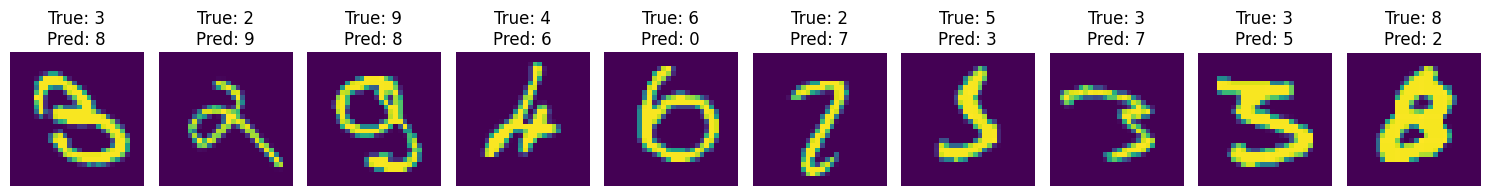

In [7]:
import numpy as np

# Get predictions
predictions = model.predict(X_test)
#Find the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
#One hot encode and then get the true classes
true_classes = np.argmax(to_categorical(y_test, num_classes=10), axis=1)
#Finds the indicies where test images were classified wrong
misclassified_indices = np.where(predicted_classes != true_classes)[0]

#Plots the missclassified images
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
#goes through all the missclassified images
for i, x in enumerate(misclassified_indices[:10]):
    axes[i].imshow(X_test[x].reshape(28, 28))
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"True: {true_classes[x]}\nPred: {predicted_classes[x]}")
plt.tight_layout()
plt.show()


Outputs 10 of the wrongly classified numbers (I tried to do all but it kept crashing)


**Epoches (first is accuracy 2nd number is val_accuracy):**

3: .9769, .9984

5: .9867, .9894

7: .9922, .9934

10: .9951, .9966

11: .9964, .9942

12: .9965, .9961

13: .9972, .9988

14: .9964,.9956

20: .9982, .9975


**Batch Size:**

32: .9982, .9975

64: .9972, .9976

128: .9954, .9976


**Optimizer:**

adam: .9982, .9975

sgd: .9612, .9641


**Units: (Total)**

128: .9982, .9975

192(w/ dropout): 0.9569, 0.9869

256: 0.9835, 0.9869




**patience**

3: .9959, .995

5: .9982, .9975

**Learning Rate**

0.001: 0.9982, 0.9975

0.05: 0.757, 0.747

